# Домашнее задание по теме "Дисперсионный анализ и A/B-тесты"

Ниже представлено несколько блоков задач. Пожалуйста, выполните их в этом ноутбуке, загрузите в [Google Colab](https://colab.research.google.com/notebooks/welcome.ipynb?hl=ru) и предоставьте ссылку на него эксперту через Личный Кабинет.

In [494]:
 # Подгрузим пакеты
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

### Блок 1

✅ Задание № 1
Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов
- Визуально подтвердить результат
    
`A` - результаты для группы людей получающих препарат А.

`B` - результаты для другой группы людей, получающих препарат B.

In [495]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

# Ваш код для решения задачи


stat, p = stats.ttest_ind(A, B)
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, различий, вероятно, нет')
else:
    print('Отклоняем нулевую гипотезу, рахличия, вероятно, есть')

Не отклоняем нулевую гипотезу, различий, вероятно, нет


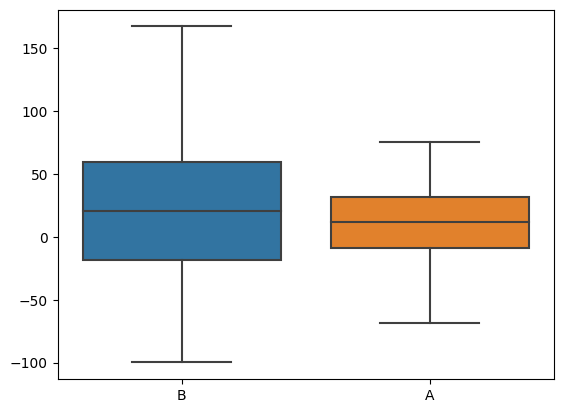

In [496]:
df = pd.DataFrame(A, B).reset_index()
df.columns=['B', 'A']
sns.boxplot( data=df )
plt.show()

**Средние у обоих препаратов статистически равны, раздичия в эффекте у пациентов нет.**



---



✅ Задание № 2
Допустим, вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы — водой с удобнением, третью группу огурцов будем поливать минералкой.
    
 - Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой?
 - Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью `boxplot` или `hist`
    
`water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]`

`nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]`

`mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]`

<Axes: >

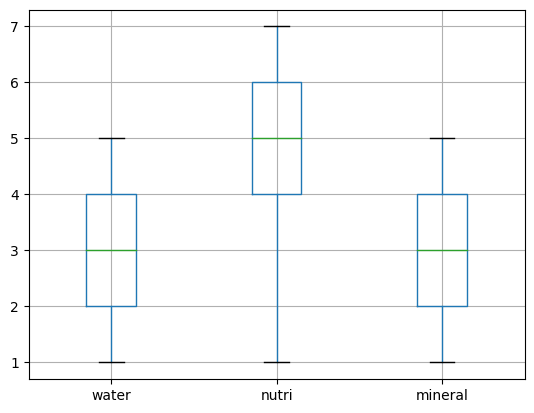

In [497]:
#  Ваш код для решения задачи

water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]
nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]
w = pd.Series(water)
n = pd.Series(nutri)
m = pd.Series(mineral)
df = pd.concat([w, n, m], axis = 1)
df.columns = ['water', 'nutri', 'mineral']
df['water'].fillna(df['water'].mean(), inplace=True)
df['water'] = df['water'].astype(int)
df.boxplot()

In [498]:
# Общая средняя
grand_mean = df.values.flatten().mean()

# Общая сумма квадратов sst = ssb + ssw
sst = sum((val - grand_mean)**2 for val in df.values.flatten())

# Отклонение групповых средний от общей средней
ssb = sum(df[group].size * (group_mean - grand_mean) ** 2 for group, group_mean in df.mean().items())

# Отклонения значений внутри группы от средней группы
ssw = sum(sum((x - group_mean)**2 for x in df[group]) for group, group_mean in df.mean().items())

groups = df.shape[1]
# # Степени свободы
dfb = groups - 1
dfw = df.size - groups

# # Межгрупповой средний квадрат
mssb = ssb/dfb

# # Внутригрупповой средний квадрат
mssw = ssw/dfw

f_value = mssb/mssw

p = stats.f.sf(f_value, dfb, dfw)

if p < 0.05:
    print(f'отклоняем нулевую гипотезу, p = {p:.2f}, средние, вероятно, различаются')
else:
    print(f'НЕ отклоняем нулевую гипотезу, p = {p:.2f}, средние, вероятно, не различаются')
print(f"Полученное f-значение {f_value}")

отклоняем нулевую гипотезу, p = 0.00, средние, вероятно, различаются
Полученное f-значение 13.033419023136258


In [499]:
# ничего не понятно, но очень интересно. сравним попарно, так на всякий случай
print('Сравним минералку с удобрениями')
stat, p = stats.ttest_ind(df['nutri'], df['mineral'])
if p > 0.05:
    print(f' p = {p:.2f} Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print(f' p = {p:.2f} Отклоняем нулевую гипотезу, распределения, вероятно, различаются')
print('Сравним минералку с водой')
stat, p = stats.ttest_ind(df['water'], df['mineral'])
if p > 0.05:
    print(f' p = {p:.2f} Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print(f' p = {p:.2f} Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Сравним минералку с удобрениями
 p = 0.00 Отклоняем нулевую гипотезу, распределения, вероятно, различаются
Сравним минералку с водой
 p = 1.00 Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые


**Таким образом, выходит, что анализ для трёх групп показал, что средние хотя бы между двумя выборками разные. Однако при ближайшем рассмотрении выяснилось что разницы между поливом водой и минеральной водой нет абсолютно никакой.**

Бракованая минералка, однако, минералов в нее не положили.

### Блок 2
✅ Cookie Cats

Cookie Cats — чрезвычайно популярная мобильная игра, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедините три», в которой игрок должен соединять плитки одного цвета, чтобы очистить поле и выиграть уровень. Здесь также есть поющие кошки.

По мере прохождения уровней игроки время от времени сталкиваются с воротами, которые заставляют их ждать или совершать покупки в приложении, чтобы продолжить. Помимо стимулирования покупок в приложении, эти ворота дают игрокам вынужденный перерыв в игре, что, как мы надеемся, приведёт к увеличению времени, проведённому в игре, и продлению удовольствия от игры.

<b>Но где ставить ворота? </b>
Изначально первые ворота были размещены на уровне `30`. В этом проекте вам предлагается проанализировать A/B-тест, в котором создатели переместили первые ворота в Cookie Cats с `30` уровня на уровень `40`. В частности, вам надо рассмотреть влияние A/B-теста на удержание игроков.

In [500]:
cookie_cats = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/cookie_cats.csv'

data = pd.read_csv(cookie_cats, error_bad_lines=False)  # Откроем датасет
data.info()

<ipython-input-500-87e758be1497>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv(cookie_cats, error_bad_lines=False)  # Откроем датасет


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


**Данные получены от 90 189 игроков, которые установили игру во время проведения A/B-теста. Переменные:**

* `userid` - уникальный номер, идентифицирующий каждого игрока.
* `version` - был ли игрок помещён в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).
* `sum_gamerounds` - количество игровых раундов, сыгранных игроком в течение первой недели после установки
* `retention_1` - игрок вернулся и поиграл через 1 день после установки?
* `retention_7` - игрок вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали `gate_30` или `gate_40`.

#### Задание: провести анализ данных и сделать выводы о лучшем месте для установки ворот.
    
**Замечание:** приведённых вспомогательных фрагментов кода не хватает для ответа на вопрос.

Делать выводы необходимо, опираясь на статистические тесты, разобранные в лекции.

Большим плюсом будет построение визуализиции для подтверждения ваших выводов. Рекомендуем использовать `seaborn` c его `sns.boxplot`/`sns.carplot`, `sns.barplot`, но можно обойтись и `matplotlib`

In [501]:
#Сгрупируем результаты теста по версиям игры.
data.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


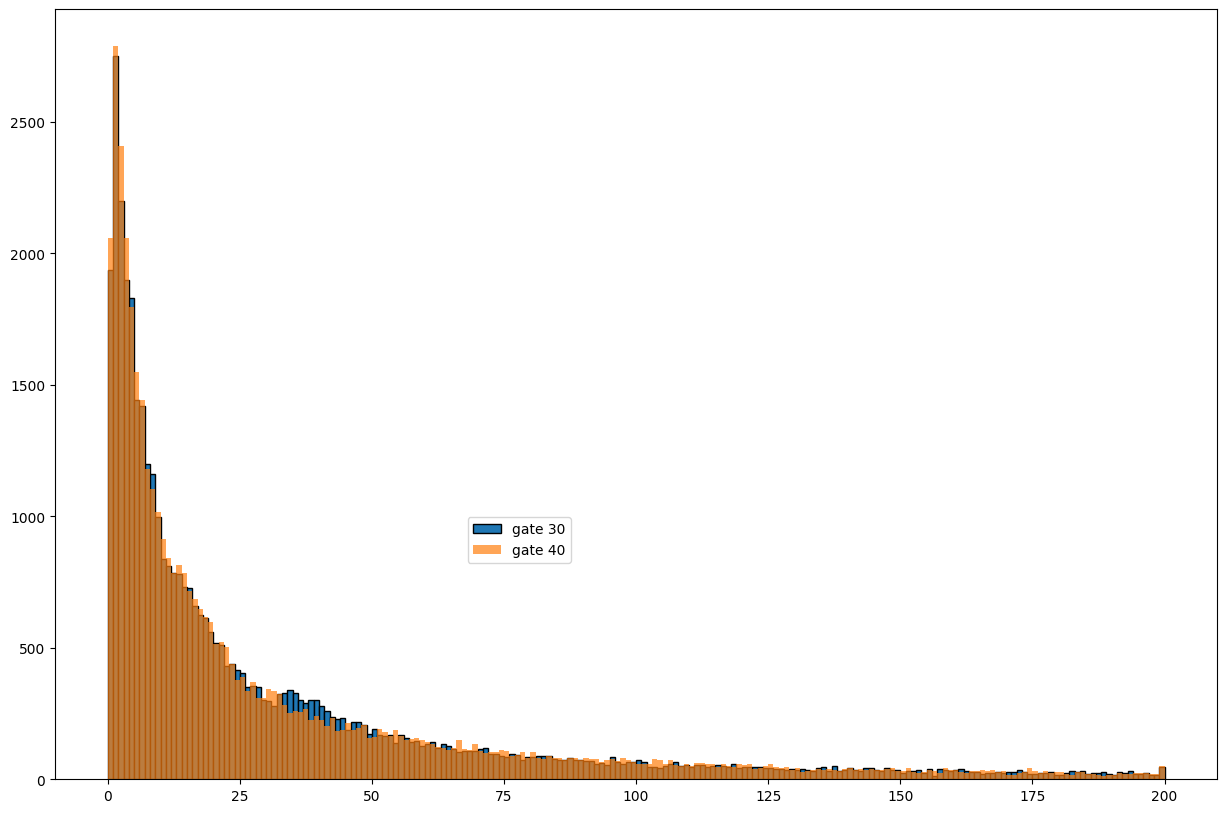

In [502]:
v_30 = data.loc[data.version == 'gate_30']
v_40 = data.loc[data.version == 'gate_40']
v_30 = v_30.drop(v_30.loc[v_30.sum_gamerounds > 200].index)
v_40 = v_40.drop(v_40.loc[v_40.sum_gamerounds > 200].index)


bins = 200
plt.figure(figsize=(15, 10))
plt.hist(v_30['sum_gamerounds'], bins=bins, alpha=1, edgecolor='black', label='gate 30')
plt.hist(v_40['sum_gamerounds'], bins=bins, alpha=0.7, label='gate 40')
plt.legend(loc='upper right', bbox_to_anchor=(0.45, 0.35))
plt.show()

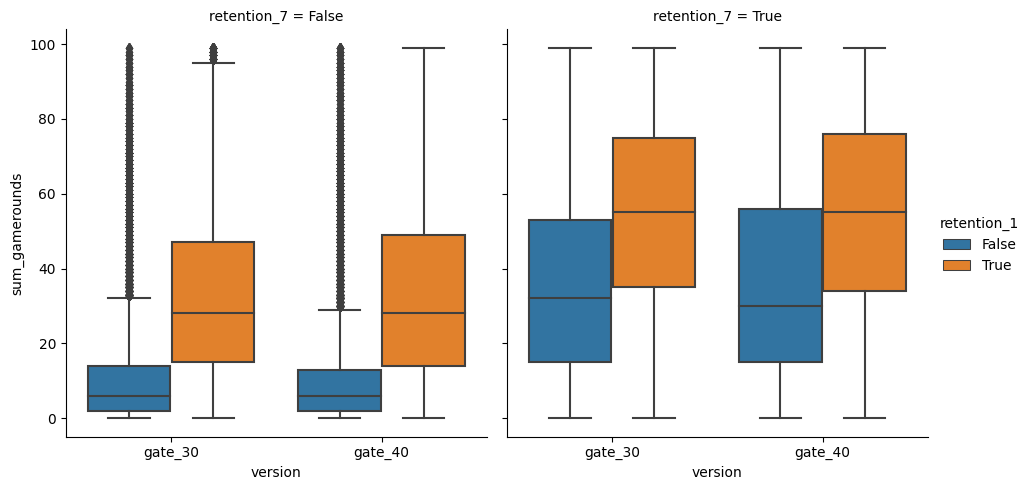

In [503]:
df = data.loc[data['sum_gamerounds'] < 100].copy();


sns.catplot(x="version", y="sum_gamerounds",
            hue="retention_1", col = 'retention_7',
            data=df, kind="box",
            height=5, aspect=.95);


<Axes: ylabel='Density'>

<Figure size 1500x1000 with 0 Axes>

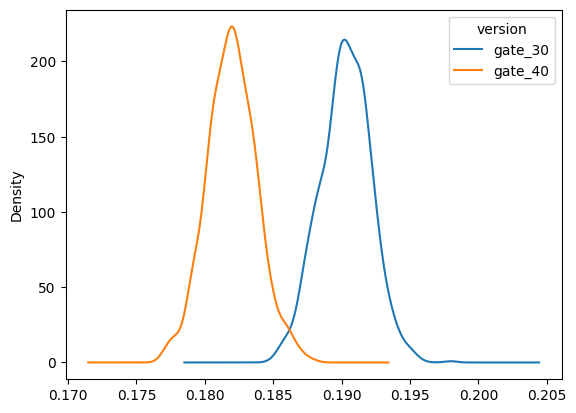

In [504]:
#Если вдруг оказалось сложно, то вот ещё один способ визуализации различий
plt.figure(figsize=(15, 10))

boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac = 1, replace = True).groupby('version')['retention_7'].mean()  #retention_1
    boot_1d.append(boot_mean)

# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)
boot_1d.plot(kind='density')

In [505]:
# Напишите Ваш код для решения задачи
from scipy.stats import f_oneway
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
import scipy.stats as stats

f, p = f_oneway(data[data['version'] == 'gate_30']['sum_gamerounds'], data[data['version'] == 'gate_40']['sum_gamerounds'])
print(f'Statistic = {f}, pval = {p}')

Statistic = 0.7939569526814368, pval = 0.3729086824696095


In [506]:
stat, p = mannwhitneyu(data[data['version'] == 'gate_30']['sum_gamerounds'], data[data['version'] == 'gate_40']['sum_gamerounds'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=1024331250.500, p=0.050


Ниже, пожалуйста, напишите Ваши выводы на основании решения:

f_oneway pval = 0.37 это > 0,05 нулевая гипотеза не может быть отклонена и разница между средними значениями не является статистически значимой.

mannwhitney pval = 0,05 то нулевую гипотезу мы не можем отклонить, так как средние различаются не значительно

**А это означает, что статистически нет разницы где ставить ворота: на gate-30 или gate-40**



---



### Блок 3
#### Покемоны и A/B-тестирование

Покемоны — это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) и относятся к одному или двум так называемым классам (вода, огонь и т. д.).

Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex.

**Описание набора данных**
Профессор Оук скопировал всё содержимое в память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

**Обратите внимание, что у покемона может быть один или два класса. Если у покемона два класса, считается, что они имеют одинаковую значимость.**

In [507]:
# Откроем датасет

pokemon_path = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv'
pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)
pokemon.head()

<ipython-input-507-1e6d6fedfab1>:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


✅ **Задание № 1**
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем покемоны в классе `rock`. Проверьте, прав ли он, и убедите его в своём выводе статистически.
    
Примечание:
- покемоны, которые относятся к обоим классам, не должны входить в выборку;
- Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

In [508]:
df_grass = pokemon[((pokemon['Class 1'] == 'Grass') & (pokemon['Class 2'] != 'Rock')) | ((pokemon['Class 2'] == 'Grass') & (pokemon['Class 1'] != 'Rock'))]
df_rock = pokemon[((pokemon['Class 1'] == 'Rock') & (pokemon['Class 2'] != 'Grass')) | ((pokemon['Class 2'] == 'Rock') & (pokemon['Class 1'] != 'Grass'))]

# так как выборки имеют нормальное распределение:
stat, p = stats.f_oneway(df_rock['Sp. Atk'], df_grass['Sp. Atk'])
print(f'Statistics={stat}, p={p}')
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')
# посмотрим на средние атаки
grass_mean = df_grass['Sp. Atk'].mean()
rock_mean = df_rock['Sp. Atk'].mean()
print(f'Средняя атака травяных покемонов = {grass_mean:.2f}')
print(f'Средняя атака каменных покемонов = {rock_mean:.2f}')


Statistics=8.215268409830244, p=0.004764052382633714
Отклоняем нулевую гипотезу, распределения, вероятно, различаются
Средняя атака травяных покемонов = 72.98
Средняя атака каменных покемонов = 60.02


**Подтверждено.
 Статистически распределения атаки травяных покемонов и каменных различаются.
 Средняя атака травяных покемонов на 12,96 едениц выше, чем каменных.**



---



✅ **Задание № 2**
    
Профессор Оук уже долго не может спать по ночам, ведь его волнует вопрос: а правда ли, что покемоны в классе `Water` в среднем быстрее покемонов в классе `Normal`.

Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание:
- покемоны, которые относятся к обоим классам, не должны входить в выборку;
- Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

In [509]:
df_water = pokemon[((pokemon['Class 1'] == 'Water') & (pokemon['Class 2'] != 'Normal')) |
            ((pokemon['Class 2'] == 'Water') & (pokemon['Class 1'] != 'Normal'))]
df_normal = pokemon[((pokemon['Class 1'] == 'Normal') & (pokemon['Class 2'] != 'Water')) |
            ((pokemon['Class 2'] == 'Normal') & (pokemon['Class 1'] != 'Water'))]

# так как выборки имеют нормальное распределение:
stat, p = stats.ttest_ind(df_water['Speed'], df_normal['Speed'])
print(f'Statistics={stat}, p={p}')
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

# сравним средние скорости
water_speed = df_water['Speed'].mean()
normal_speed = df_normal['Speed'].mean()
print(f'Средняя скорость водных покемонов = {water_speed:.2f}')
print(f'Средняя скорость нормальных покемонов = {normal_speed:.2f}')

Statistics=-2.150913330007121, p=0.03255353551391033
Отклоняем нулевую гипотезу, распределения, вероятно, различаются
Средняя скорость водных покемонов = 64.94
Средняя скорость нормальных покемонов = 72.26


**Опровергнуто.
 Статистически распределения скорости водных покемонов и нормальных различаются.
 Средняя скорость водных покемонов на 7,32 еденицы ниже, чем нормальных.**



---



**Задание № 3:**
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона.
Однако мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку некоторым покемонам (массив `treathed_pokemon`).
Проверьте, работает ли вообще его сыворотка, и убедите всех в своем выводе статистически.
    
    
*Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.*

In [510]:
# Покемоны, которые принимали сыворотку
treathed_pokemon = ['Mega Beedrill','Mega Alakazam', 'Deoxys Normal Forme', 'Mega Lopunny']

In [511]:

df = pokemon[pokemon['Name'].isin(treathed_pokemon)]
df1 = pokemon[~pokemon['Name'].isin(treathed_pokemon)]
df

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,False
71,72,Mega Alakazam,Psychic,NaN,55,50,65,175,95,150,False
428,429,Deoxys Normal Forme,Psychic,NaN,50,150,50,150,50,150,True
476,477,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,False


# **Как ответственный эксперт по ловле покемонов заявляю**:
**данных не хватает, сравнивать нечего.**
**В случае с сывороткой логично сравнивать одних и техже покемонов ДО принятия сыворотки и ПОСЛЕ**.
**К тому же достоверно известно, что МЕГА формы покемонов априори сильнее и быстрее любых других**.



---



✅ **Задание № 4**
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако профессор не очень уверен, что они лучше остальных покемонов.
Оук предложил разобраться в этом Вам.

Действительно ли сумма характеристик `HP`, `Attack`, `Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров?

Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.

*Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.*

In [512]:
pokemon['sum'] = pokemon['HP'] + pokemon['Attack'] + pokemon['Defense']
pokemon['multiply'] = pokemon['HP'] * pokemon['Attack'] * pokemon['Defense']

# так как выборки имеют нормальное распределение, рассмотрим сумму:

stat, p = stats.ttest_ind(pokemon[pokemon['Legendary'] == True]['sum'], pokemon[pokemon['Legendary'] == False]['sum'])
print(f'Statistics={stat}, p={p}')
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

# посмотрим средние суммы
avg_sum_mega = pokemon[pokemon['Legendary'] == True]['sum'].mean()
avg_sum_notmega = pokemon[pokemon['Legendary'] == False]['sum'].mean()
print(f'Средняя сумма показателей легендарных покемонов покемонов = {avg_sum_mega:.2f}')
print(f'Средняя сумма показателей не легендарных покемонов покемонов = {avg_sum_notmega:.2f}')

Statistics=11.591852366462316, p=7.970942205722087e-29
Отклоняем нулевую гипотезу, распределения, вероятно, различаются
Средняя сумма показателей легендарных покемонов покемонов = 309.08
Средняя сумма показателей не легендарных покемонов покемонов = 214.41


In [513]:
# рассмотрим произведение:

stat, p = stats.ttest_ind(pokemon[pokemon['Legendary'] == True]['multiply'], pokemon[pokemon['Legendary'] == False]['multiply'])
print(f'Statistics={stat}, p={p}')
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

# посмотрим средние произведения
avg_mul_mega = pokemon[pokemon['Legendary'] == True]['multiply'].mean()
avg_mul_notmega = pokemon[pokemon['Legendary'] == False]['multiply'].mean()
print(f'Среднее произведение показателей легендарных покемонов покемонов = {avg_mul_mega:.2f}')
print(f'Среднее произведение показателей не легендарных покемонов покемонов = {avg_mul_notmega:.2f}')

Statistics=13.263253408231844, p=1.992664308842282e-36
Отклоняем нулевую гипотезу, распределения, вероятно, различаются
Среднее произведение показателей легендарных покемонов покемонов = 1085941.62
Среднее произведение показателей не легендарных покемонов покемонов = 425041.39


**Подтверждено**.
**Статистически распределения суммы и произведения для легендарных и не легендарных покемонов различаются**.
**Средняя сумма показателей легендарных покемонов выше на 94,67 еденицы, чем у нелегендарных.**
**Среднее произведенеие у легендарных покемонов в 2,55 раза выше, чем у не легендарных.**



---



✅ **Задание № 5**
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса (массив `best_defence_class`), которые на его взгляд одинаковы по "силе обычной защиты" `Defense`.

Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо. Все та же статистика Вам в помощь!


In [514]:
best_defence_class = ['Rock', 'Ground','Steel','Ice']
p_rock = pokemon[(pokemon['Class 1'] == 'Rock') | (pokemon['Class 2'] == 'Rock')]
p_ground = pokemon[(pokemon['Class 1'] == 'Ground') | (pokemon['Class 2'] == 'Ground')]
p_steel = pokemon[(pokemon['Class 1'] == 'Steel') | (pokemon['Class 2'] == 'Steel')]
p_ice = pokemon[(pokemon['Class 1'] == 'Ice') | (pokemon['Class 2'] == 'Ice')]

In [515]:
fvalue, p = stats.f_oneway(p_rock['Defense'], p_ground['Defense'], p_steel['Defense'], p_ice['Defense'])

print(f'Статистика={fvalue}, p={p}')
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

pr = p_rock['Defense'].mean()
pg = p_ground['Defense'].mean()
ps = p_steel['Defense'].mean()
pi = p_ice['Defense'].mean()
print(f'Cредние суммы обычной силы защиты:')
print(f'каменные покемоны = {pr:.2f}:')
print(f'земляные покемоны = {pg:.2f}:')
print(f'стальные покемоны = {ps:.2f}:')
print(f'ледяные покемоны = {pi:.2f}:')

Статистика=10.82012408304731, p=1.231528168152447e-06
Отклоняем нулевую гипотезу, средние, вероятно, различаются
Cредние суммы обычной силы защиты:
каменные покемоны = 107.09:
земляные покемоны = 87.70:
стальные покемоны = 116.61:
ледяные покемоны = 76.66:


**Опровергнуто.**
**Средние выборок различны для каменных, земляных, стальных и ледяных покемонов**



---

